# 示例一：

## 1.导入依赖包

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

## 2.加载数据集并改变图片维度

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()
train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

## 3.搭建模型

In [3]:
model = tf.keras.Sequential()
model.add(Conv2D(24, kernel_size=5, padding='same', activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPool2D())

model.add(Conv2D(48, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(48, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(48, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D(padding='same'))

model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D(padding='same'))

model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D(padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

## 4.定义优化器、损失函数和评价指标

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

## 5.训练模型

In [5]:
history = model.fit(train_x, train_y, epochs=5, validation_data=(test_x, test_y))
print(history.history.keys())

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5470 - acc: 0.7944 - val_loss: 0.3878 - val_acc: 0.8586
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3336 - acc: 0.8795 - val_loss: 0.3064 - val_acc: 0.8919
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2816 - acc: 0.8992 - val_loss: 0.3045 - val_acc: 0.8922
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2586 - acc: 0.9082 - val_loss: 0.2915 - val_acc: 0.8961
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2369 - acc: 0.9154 - val_loss: 0.2937 - val_acc: 0.8970
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


## 6.绘制准确率变化情况

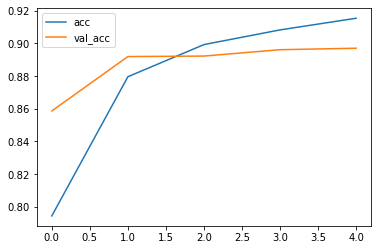

In [6]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

## 7.绘制模型损失变化情况

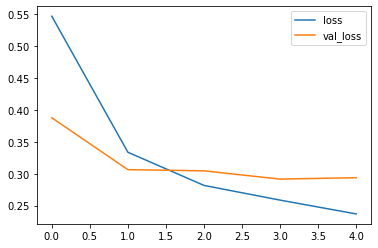

In [7]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()

# 示例二：增加数据增广

## 1.导入依赖包

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization, Dropout

## 2.加载数据集并改变图片维度

In [9]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()
train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

## 3.数据增广

In [10]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    width_shift_range=0.1,
    height_shift_range=0.1)

## 4.定义模型

In [11]:
model = tf.keras.Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

## 5.定义优化器、损失函数和评价指标

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

## 6.将图片进行数据增广

In [13]:
datagen.fit(train_x)

## 7.训练模型

In [14]:
history = model.fit(datagen.flow(train_x, train_y, batch_size=32),
                    epochs=5, validation_data=(test_x, test_y))
print(history.history.keys())

Epoch 1/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.7562 - acc: 0.7205 - val_loss: 0.5010 - val_acc: 0.8087
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.5279 - acc: 0.8033 - val_loss: 0.4050 - val_acc: 0.8487
Epoch 3/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.4572 - acc: 0.8318 - val_loss: 0.3654 - val_acc: 0.8685
Epoch 4/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.4165 - acc: 0.8476 - val_loss: 0.3003 - val_acc: 0.8909
Epoch 5/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.3882 - acc: 0.8579 - val_loss: 0.3105 - val_acc: 0.8840
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


## 8.绘制准确率变化情况

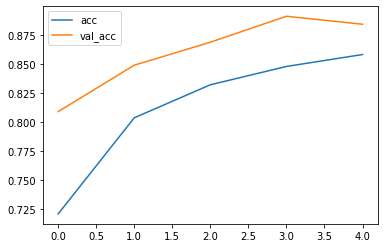

In [15]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

## 9.绘制模型损失变化情况

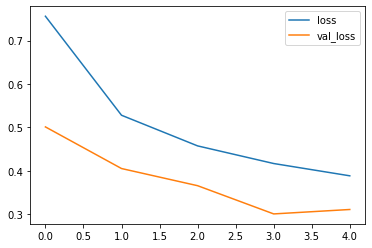

In [16]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()